### Importação dos dados



In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

In [8]:
# Junta as bases num unico datafram
chaves = ['loja1','loja2','loja3','loja4']
dataframes = [loja, loja2, loja3, loja4]
df = pd.concat(dataframes, keys= chaves)
df = df.reset_index()
df = df.rename(columns={'level_0': 'Loja', 'level_1': 'indice_original'})
df = df.drop(columns='indice_original', axis = 1)

# 1. Análise do faturamento


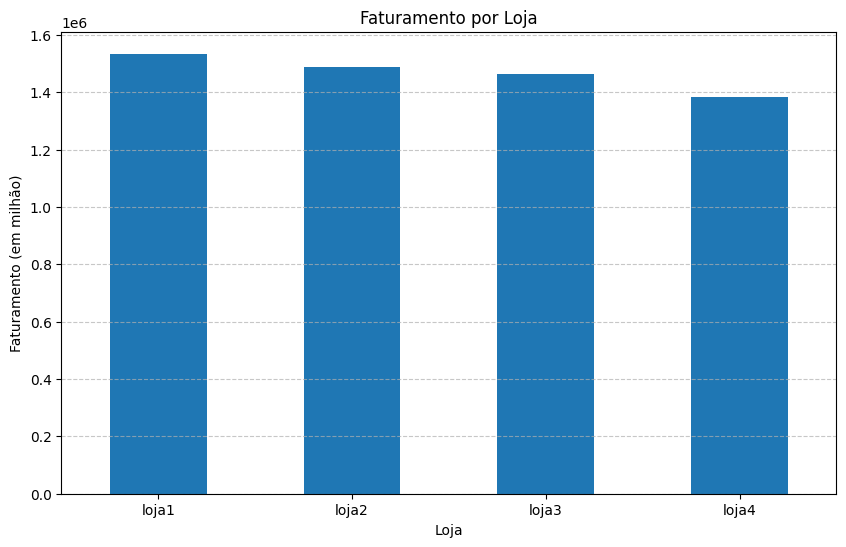

In [10]:
faturamento = df.groupby('Loja')['Preço'].sum()
faturamento.plot(kind = 'bar', figsize= (10,6))

plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (em milhão)')
plt.xticks(rotation=0)  # Deixa os rótulos do eixo X na horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona linhas de grade

plt.show()

# 2. Vendas por Categoria


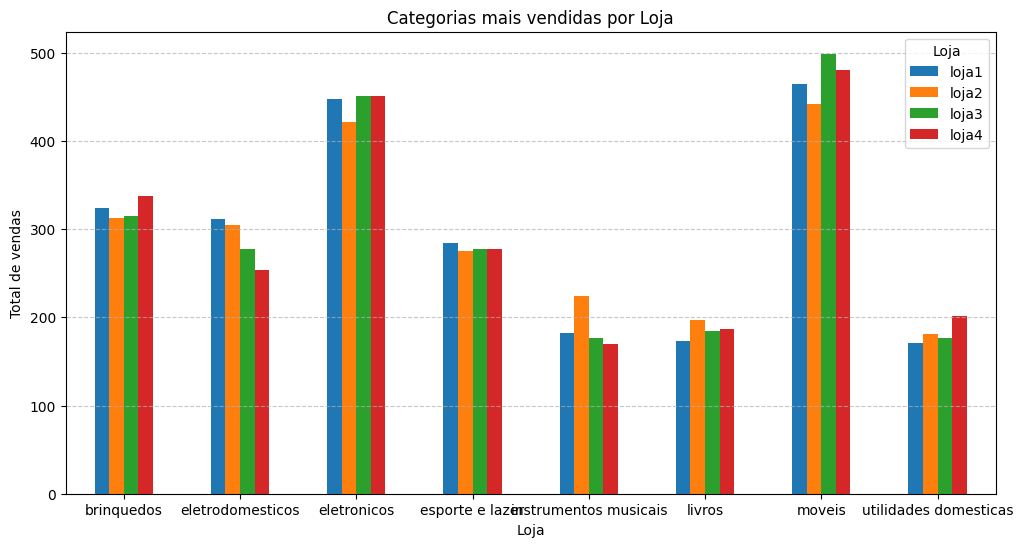

In [18]:
categoria = df.groupby(["Categoria do Produto","Loja",]).size().unstack().fillna(0)
categoria.plot(kind = 'bar',figsize= (12,6))

plt.title('Categorias mais vendidas por Loja')
plt.xlabel('Loja')
plt.ylabel('Total de vendas')
plt.xticks(rotation=0)  # Deixa os rótulos do eixo X na horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona linhas de grade

plt.show()

# 3. Média de Avaliação das Lojas

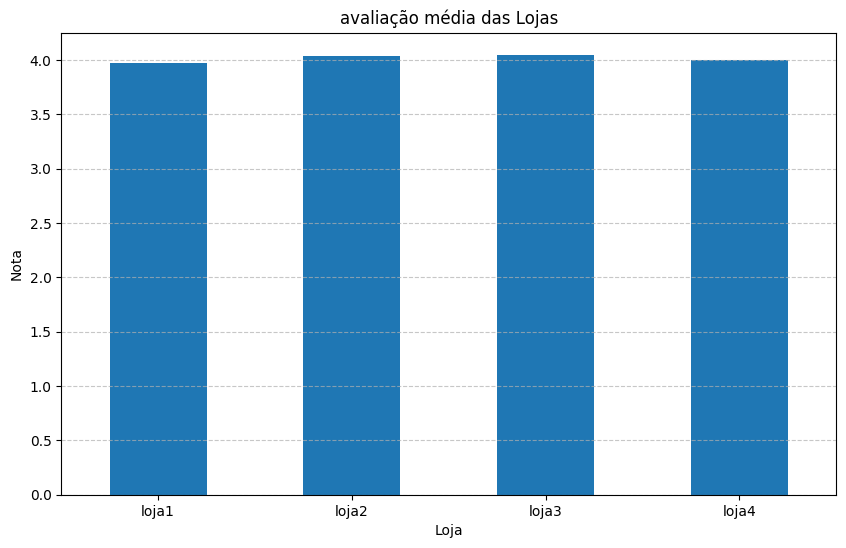

In [13]:
avaliacao = df.groupby('Loja')['Avaliação da compra'].mean()
avaliacao.plot(kind = 'bar',figsize= (10,6))
plt.title('avaliação média das Lojas')
plt.xlabel('Loja')
plt.ylabel('Nota')
plt.xticks(rotation=0)  # Deixa os rótulos do eixo X na horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona linhas de grade

plt.show()


# 4. Produtos Mais e Menos Vendidos

In [15]:
produtos = df.groupby(['Loja','Produto'])['Produto'].count()
produtos_mais_vendidos_loja = produtos.groupby('Loja').idxmax()
mais_vendidos = pd.DataFrame(produtos.loc[produtos_mais_vendidos_loja])
mais_vendidos['Categoria'] = 'Mais Vendidos'


In [16]:
produtos_menos_vendidos_loja = produtos.groupby('Loja').idxmin()
menos_vendidos = pd.DataFrame(produtos.loc[produtos_menos_vendidos_loja])
menos_vendidos['Categoria'] = 'Menos Vendidos'


In [17]:
produtos_loja = pd.concat([mais_vendidos,menos_vendidos])
produtos_loja


,,Produto,Categoria
Loja,Produto,,
loja1,Guarda roupas,60,Mais Vendidos
loja2,Iniciando em programação,65,Mais Vendidos
loja3,Kit banquetas,57,Mais Vendidos
loja4,Cama box,62,Mais Vendidos
loja1,Celular ABXY,33,Menos Vendidos
loja2,Jogo de tabuleiro,32,Menos Vendidos
loja3,Blocos de montar,35,Menos Vendidos
loja4,Guitarra,33,Menos Vendidos


# 5. Frete Médio por Loja


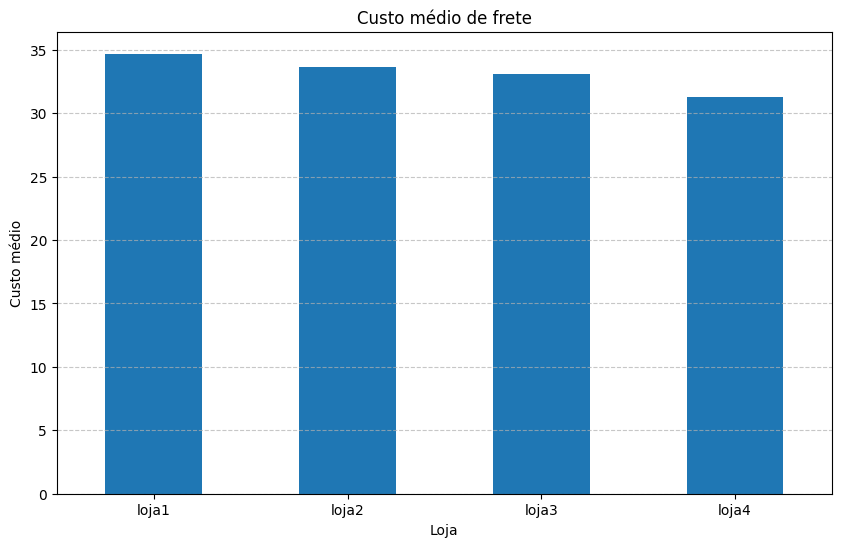

In [14]:
frete = df.groupby(['Loja'])['Frete'].mean()
frete.plot(kind = 'bar',figsize= (10,6))
plt.title('Custo médio de frete')
plt.xlabel('Loja')
plt.ylabel('Custo médio')
plt.xticks(rotation=0)  # Deixa os rótulos do eixo X na horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona linhas de grade

plt.show()


# 6. Resultados

A Loja 1 apresenta maior faturamento mesmo com o maior custo médio de frete. Enquanto a Loja 4, por outro lado, apresentou o menor faturamento e também o menor custo médio de frete.
Em geral, a Loja 4 apresentou quantidade de vendas semelhantes aos da Loja 1 se olharmos para as vendas por categoria, o que indica que a Loja 1 apresentou maior faturamento por vender produtos de maior valor agregado que a demais lojas.

Com base nisso, se o objetivo da venda for arrecadar mais fundos para o novo investimento, recomenda-se a venda da Loja 1 que possui mais faturamento e consequentemente maior valor de mercado e potencial de venda. Uma vez que além do maior faturamento a Loja vende produtos de maior valor agregado mesmo com maior custo de frete.